In [35]:
import pandas as pd
import pydotplus 

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cross_validation import cross_val_score
import numpy as np

In [36]:
frame = pd.read_csv('german_credit_data/german_credit.csv', header=0, sep=',')

In [39]:
frame.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(frame.iloc[:, 1:], frame.Creditability)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
features_names = frame.columns.values[1:]
features_names[8] = 'Sex and Marital Status'
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=features_names,  
                         class_names=['non creditable', 'creditable'],  
                         filled=True, rounded=True,  
                         special_characters=True)  


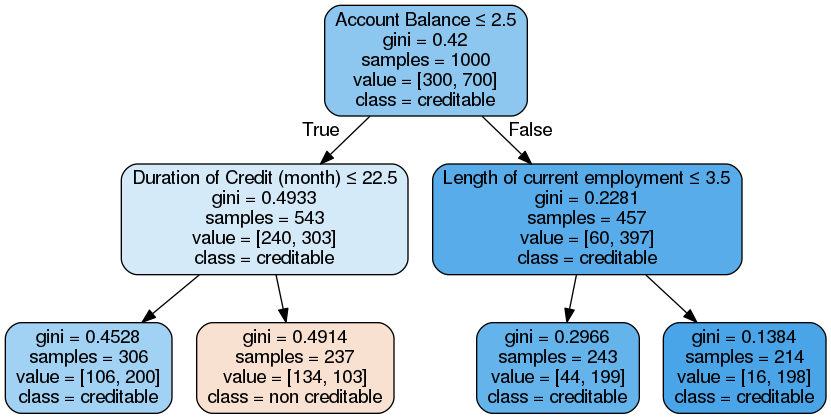

In [7]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

Если у человека сейчас мало денег на счету, то при маленьком сроке кредитования маловероятно, что человек сможет отдать сумму, взятую в кредит, в случае, если у человека много денег в настоящий момент и/или длительность кридита большая, то он с большой вероятностью отдаст деньги 

In [20]:
score = []
depth = range(1,len(features_names))
for i in depth:
    score.append(np.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth=i), frame.iloc[:, 1:], frame.Creditability, cv=5)))

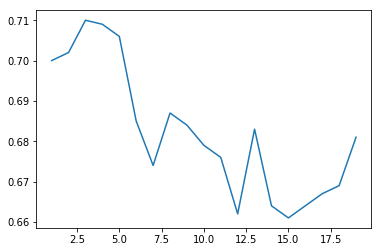

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(depth,score)
plt.show()

In [22]:
print "The biggest score is with depth: %d (cross-validation)" % depth[score.index(np.max(score))]

The biggest score is with depth: 3 (cross-validation)


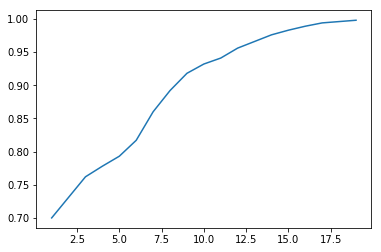

In [23]:
score = []
depth = range(1,len(features_names))
for i in depth:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(frame.iloc[:, 1:], frame.Creditability)
    train_predictions = model.predict(frame.iloc[:, 1:])
    score.append(accuracy_score(frame.Creditability, train_predictions))
plt.plot(depth,score)
plt.show()

In [25]:
print "The biggest score is with depth: %d (accuracy score for train data)" % depth[score.index(np.max(score))]

The biggest score is with depth: 19 (accuracy score for train data)
